# Creating distance matrix by OpenStreetMap API

In [69]:
import osmnx as ox
import networkx as nx
import numpy as np

# Define the city you are interested in
city = 'Rome, Roma, Lazio, Italy'

# Download the road network data for the city
graph = ox.graph_from_place(city, network_type='drive')

In [126]:
center_point = (41.90274, 12.51943)
point_1 = (41.90297, 12.46037)
point_2 = (41.85293, 12.44755)
point_3 = (41.86745, 12.53679)
point_4 = (41.93886, 12.54124)
points = [center_point, point_1, point_2, point_3, point_4]

# Get the nodes corresponding to the points
nodes = []
for point in points:
    node = ox.distance.nearest_nodes(graph, point[1], point[0])
    nodes.append(node)

# Calculate the distance matrix between the nodes
distance_matrix = np.full((len(nodes), len(nodes)), np.inf)
for i in range(len(nodes)):
    for j in range(i, len(nodes)):
        if i == j:
            distance_matrix[i, j] = 0
        elif nx.has_path(graph, nodes[i], nodes[j]):
            distance_matrix[i, j] = nx.shortest_path_length(graph, nodes[i], nodes[j], weight='length')
            distance_matrix[j, i] = distance_matrix[i, j]

# Print the distance matrix
print(distance_matrix)

[[    0.     6065.505 10121.508  5906.252  5449.176]
 [ 6065.505     0.     7434.86   9448.062  9362.943]
 [10121.508  7434.86      0.    10676.277 14045.844]
 [ 5906.252  9448.062 10676.277     0.    10118.929]
 [ 5449.176  9362.943 14045.844 10118.929     0.   ]]


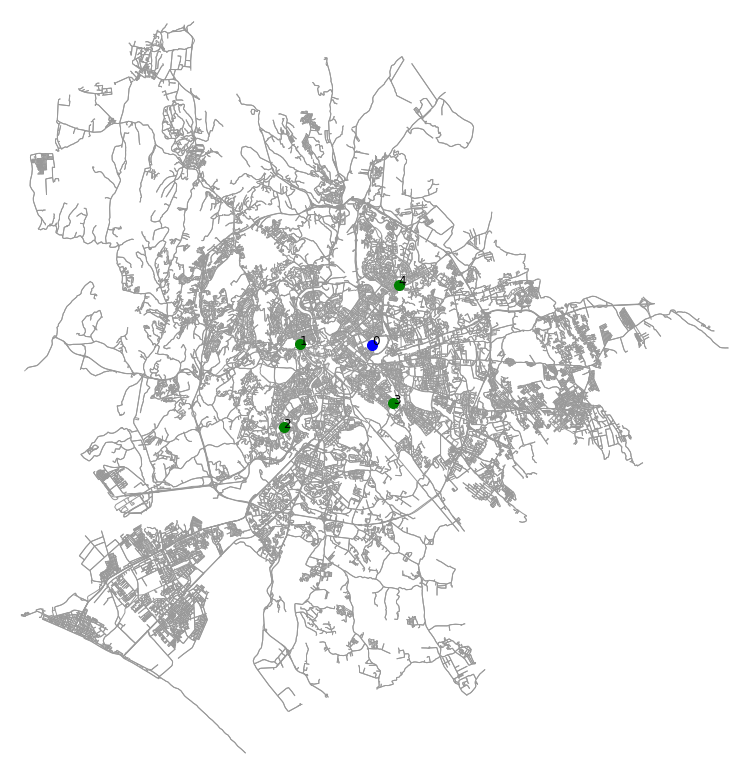

In [147]:
import matplotlib.pyplot as plt
fig, ax = ox.plot_graph(graph, figsize=(14, 14), node_size=0, show=False, close=False)
ax.scatter(center_point[1], center_point[0], c='blue', s=100, zorder=2)
ax.scatter([graph.nodes[n]['x'] for n in nodes[1:]], [graph.nodes[n]['y'] for n in nodes[1:]], c='green', s=100, zorder=2)
for i, node in enumerate(nodes):
    ax.text(graph.nodes[node]['x'], graph.nodes[node]['y'], str(i), fontsize=12)
    

ax.axis('off')
plt.show()

# Create the routing model

In [148]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

In [149]:
data = create_data_model()
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

NameError: name 'pywrapcp' is not defined